# Diplomatura en ciencia de datos, aprendizaje automático y sus aplicaciones - Edición 2023 - FAMAF (UNC)

## Mentoría 16 - ¿Cómo identificar fuga de ventas? Inteligencia artificial aplicada al sector comercial.

### Explorando Patrones de Datos a través de Clustering (TP3)

**Integrantes:**
- Canalis, Patricio.
- Chevallier-Boutell, Ignacio José.
- Villarroel Torrez, Daniel.

**Mentores:**
- Gonzalez, Lucía
- Lahoz, Nahuel

---
## Librerías

In [1]:
# Para que las funciones se actualicen sin tener que refrescar el kernel
%load_ext autoreload
%autoreload 2

# Funciones de visualización y curación
import pandas as pd
import json
from os.path import exists
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress as LR
from scipy.stats import skew, kurtosis, skewtest, kurtosistest

# Funciones de clustering
from sklearn.cluster import KMeans, MeanShift
from sklearn import manifold, preprocessing, decomposition

# Funciones propias
from utils_limpieza import * 

# Clear preferencias
plt.rcdefaults()
pd.reset_option('^display\.float_format')

---
# Preparación de Datos <span style="color:magenta">**(Paso 1)**</span>

In [2]:
# Definir grupos de variables:

F_Com = ['F_pct_Com_1905', 'F_pct_Com_1906', 'F_pct_Com_1907', 'F_pct_Com_1908', 
         'F_pct_Com_1909', 'F_pct_Com_1910', 'F_pct_Com_1911', 'F_pct_Com_1912',
         'F_pct_Com_2001', 'F_pct_Com_2002', 'F_pct_Com_2003', 'F_pct_Com_2004',
         'F_pct_Com_2005', 'F_pct_Com_2006', 'F_pct_Com_2007', 'F_pct_Com_2008',
         'F_pct_Com_2009', 'F_pct_Com_2010', 'F_pct_Com_2011', 'F_pct_Com_2012',
         'F_pct_Com_2101', 'F_pct_Com_2102', 'F_pct_Com_2103', 'F_pct_Com_2104',
         'F_pct_Com_2105', 'F_pct_Com_2106', 'F_pct_Com_2107', 'F_pct_Com_2108',
         'F_pct_Com_2109', 'F_pct_Com_2110', 'F_pct_Com_2111', 'F_pct_Com_2112',
         'F_pct_Com_2201', 'F_pct_Com_2202', 'F_pct_Com_2203', 'F_pct_Com_2204',
         'F_pct_Com_2205', 'F_pct_Com_2206']

F_Ven = ['F_pct_Ven_1905', 'F_pct_Ven_1906', 'F_pct_Ven_1907', 'F_pct_Ven_1908', 
         'F_pct_Ven_1909', 'F_pct_Ven_1910', 'F_pct_Ven_1911', 'F_pct_Ven_1912',
         'F_pct_Ven_2001', 'F_pct_Ven_2002', 'F_pct_Ven_2003', 'F_pct_Ven_2004',
         'F_pct_Ven_2005', 'F_pct_Ven_2006', 'F_pct_Ven_2007', 'F_pct_Ven_2008',
         'F_pct_Ven_2009', 'F_pct_Ven_2010', 'F_pct_Ven_2011', 'F_pct_Ven_2012',
         'F_pct_Ven_2101', 'F_pct_Ven_2102', 'F_pct_Ven_2103', 'F_pct_Ven_2104',
         'F_pct_Ven_2105', 'F_pct_Ven_2106', 'F_pct_Ven_2107', 'F_pct_Ven_2108',
         'F_pct_Ven_2109', 'F_pct_Ven_2110', 'F_pct_Ven_2111', 'F_pct_Ven_2112',
         'F_pct_Ven_2201', 'F_pct_Ven_2202', 'F_pct_Ven_2203', 'F_pct_Ven_2204',
         'F_pct_Ven_2205', 'F_pct_Ven_2206']

Y_Com = ['Y_pct_Com_2001', 'Y_pct_Com_2002', 'Y_pct_Com_2003', 'Y_pct_Com_2004',
         'Y_pct_Com_2005', 'Y_pct_Com_2006', 'Y_pct_Com_2007', 'Y_pct_Com_2008',
         'Y_pct_Com_2009', 'Y_pct_Com_2010', 'Y_pct_Com_2011', 'Y_pct_Com_2012',
         'Y_pct_Com_2101', 'Y_pct_Com_2102', 'Y_pct_Com_2103', 'Y_pct_Com_2104',
         'Y_pct_Com_2105', 'Y_pct_Com_2106', 'Y_pct_Com_2107', 'Y_pct_Com_2108',
         'Y_pct_Com_2109', 'Y_pct_Com_2110', 'Y_pct_Com_2111', 'Y_pct_Com_2112',
         'Y_pct_Com_2201', 'Y_pct_Com_2202', 'Y_pct_Com_2203', 'Y_pct_Com_2204',
         'Y_pct_Com_2205', 'Y_pct_Com_2206']

Y_Ven = ['Y_pct_Ven_2001', 'Y_pct_Ven_2002', 'Y_pct_Ven_2003', 'Y_pct_Ven_2004',
         'Y_pct_Ven_2005', 'Y_pct_Ven_2006', 'Y_pct_Ven_2007', 'Y_pct_Ven_2008',
         'Y_pct_Ven_2009', 'Y_pct_Ven_2010', 'Y_pct_Ven_2011', 'Y_pct_Ven_2012',
         'Y_pct_Ven_2101', 'Y_pct_Ven_2102', 'Y_pct_Ven_2103', 'Y_pct_Ven_2104',
         'Y_pct_Ven_2105', 'Y_pct_Ven_2106', 'Y_pct_Ven_2107', 'Y_pct_Ven_2108',
         'Y_pct_Ven_2109', 'Y_pct_Ven_2110', 'Y_pct_Ven_2111', 'Y_pct_Ven_2112',
         'Y_pct_Ven_2201', 'Y_pct_Ven_2202', 'Y_pct_Ven_2203', 'Y_pct_Ven_2204',
         'Y_pct_Ven_2205', 'Y_pct_Ven_2206']

basics = ['Modelo', 'Subrubro']

In [3]:
vectores = pd.read_csv('../data/interim/tp2_vendedores_vector_resumen.csv')
novo = pd.read_csv('../data/interim/tp3_vendedores_vector.csv')

In [4]:
print(vectores.shape)
print(novo.shape)

(4616, 148)
(4544, 140)


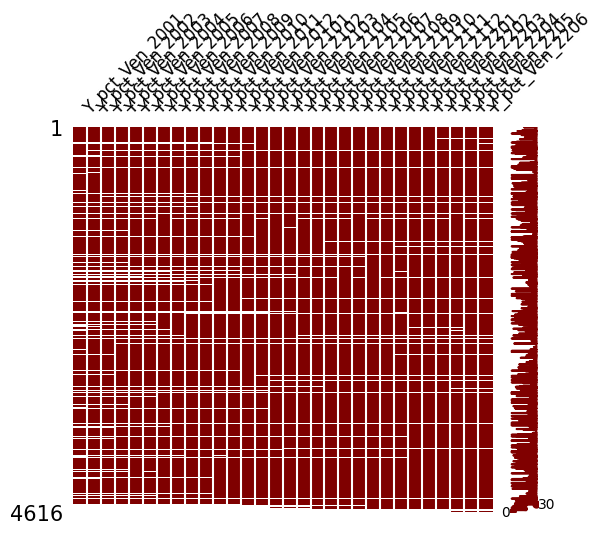

In [5]:
# Ventas anuales
vectores_interes = vectores[Y_Ven]
msno.matrix(vectores_interes, fontsize=12, color=[0.5,0,0], figsize=(6, 5))
plt.show()

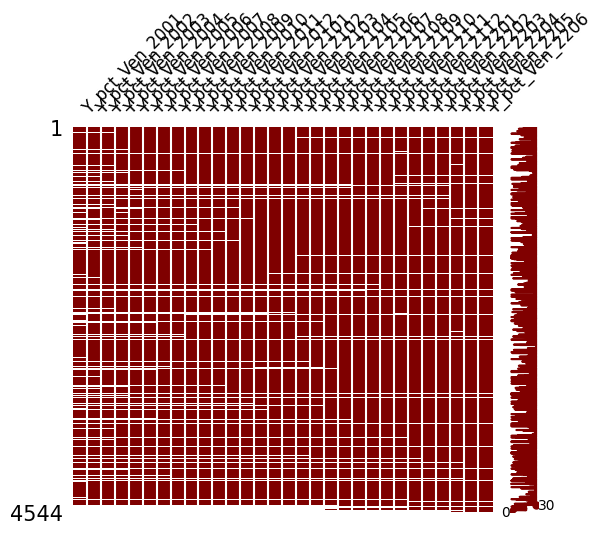

In [6]:
# Ventas anuales
novo_interes = novo[Y_Ven]
msno.matrix(novo_interes, fontsize=12, color=[0.5,0,0], figsize=(6, 5))
plt.show()

In [7]:
vectores_interes.describe()

,Y_pct_Ven_2001,Y_pct_Ven_2002,Y_pct_Ven_2003,Y_pct_Ven_2004,Y_pct_Ven_2005,Y_pct_Ven_2006,Y_pct_Ven_2007,Y_pct_Ven_2008,Y_pct_Ven_2009,Y_pct_Ven_2010,...,Y_pct_Ven_2109,Y_pct_Ven_2110,Y_pct_Ven_2111,Y_pct_Ven_2112,Y_pct_Ven_2201,Y_pct_Ven_2202,Y_pct_Ven_2203,Y_pct_Ven_2204,Y_pct_Ven_2205,Y_pct_Ven_2206
count,3859.000000,3947.000000,3992.000000,4044.000000,4080.000000,4090.000000,4110.000000,4128.000000,4153.000000,4172.000000,...,4.307000e+03,4319.000000,4327.000000,4297.000000,4332.000000,4333.000000,4337.000000,4331.000000,4339.000000,4330.000000
mean,5.284612,4.987785,2.985199,3.478920,5.815777,-5.311224,12.929481,11.976868,11.009130,11.126480,...,4.733182e+04,11.689968,-4.218298,12.345263,14.423599,14.944349,12.640662,7.694208,9.949563,11.325071
std,235.486802,164.593649,101.263061,146.871580,179.910856,437.189352,589.395135,581.205105,581.683345,581.462492,...,3.103832e+06,660.727064,1300.899788,662.696525,665.771535,670.150867,490.621261,495.898476,490.081507,495.631393
min,-33.288050,-49.377086,-10.829236,-2331.921959,-249.099910,-19394.908717,-253.450996,-28.265191,-4287.308879,-3113.111697,...,-5.124011e+02,-512.401131,-73626.945988,-89.333415,-53.048154,-511.340867,-511.340867,-6045.887010,-1943.259330,-2100.491513
25%,-0.273554,-0.275072,-0.460622,-0.712255,-0.503175,-0.367969,-0.390527,-0.402587,-0.359107,-0.373319,...,-1.905014e-01,-0.237158,-0.161484,-0.199818,-0.256589,-0.233768,-0.224072,-0.294181,-0.210311,-0.229726
50%,-0.011209,-0.017240,-0.189480,-0.288579,-0.157635,0.029273,-0.015425,-0.064288,-0.003544,-0.059192,...,8.191076e-02,0.037528,0.110513,0.042712,0.000000,0.001412,0.000000,0.000000,0.024983,0.017874
75%,0.309714,0.294387,0.183862,0.209214,0.280111,0.565627,0.452638,0.376327,0.446934,0.328419,...,5.640564e-01,0.478008,0.524596,0.415787,0.369616,0.360805,0.335368,0.356289,0.406361,0.400061
max,14566.577112,9104.766530,6293.176711,7788.080384,9234.268800,9234.268800,36606.764001,37024.978792,37024.978792,37024.978792,...,2.036975e+08,43391.319248,43391.319248,43391.319248,43391.319248,43391.319248,31642.236135,31642.236135,31642.236135,31642.236135


In [8]:
novo_interes.describe()

,Y_pct_Ven_2001,Y_pct_Ven_2002,Y_pct_Ven_2003,Y_pct_Ven_2004,Y_pct_Ven_2005,Y_pct_Ven_2006,Y_pct_Ven_2007,Y_pct_Ven_2008,Y_pct_Ven_2009,Y_pct_Ven_2010,...,Y_pct_Ven_2109,Y_pct_Ven_2110,Y_pct_Ven_2111,Y_pct_Ven_2112,Y_pct_Ven_2201,Y_pct_Ven_2202,Y_pct_Ven_2203,Y_pct_Ven_2204,Y_pct_Ven_2205,Y_pct_Ven_2206
count,3709.000000,3809.000000,3870.000000,3935.000000,3974.000000,3988.000000,4013.000000,4032.000000,4059.000000,4081.000000,...,4234.000000,4249.000000,4257.000000,4232.000000,4265.000000,4269.000000,4275.000000,4269.000000,4279.000000,4268.000000
mean,0.639883,0.828458,0.622939,0.043940,0.595711,0.759542,0.831172,0.780118,1.676257,0.612381,...,0.928998,0.629313,1.202232,1.202574,0.961065,1.263980,1.491866,0.584278,0.769378,1.290655
std,10.170290,12.481646,7.642774,23.448785,7.518616,6.926977,11.565809,9.850087,42.831557,8.298189,...,15.159792,9.604844,28.027005,17.946240,11.215600,18.428875,29.954095,21.264926,11.122018,27.444300
min,-33.288050,-49.377086,-14.819600,-1344.254686,-12.772260,-20.833340,-253.450996,-18.653693,-106.487274,-62.240781,...,-512.401131,-512.401131,-512.401131,-89.333415,-53.048154,-60.239153,-46.438610,-1040.918155,-259.483184,-280.408235
25%,-0.263566,-0.266327,-0.450295,-0.669383,-0.484627,-0.351033,-0.375310,-0.390104,-0.353625,-0.367975,...,-0.190778,-0.234491,-0.160819,-0.197282,-0.260464,-0.233768,-0.225971,-0.287856,-0.211020,-0.231710
50%,-0.010682,-0.019214,-0.187677,-0.268705,-0.152768,0.030459,-0.015643,-0.065495,-0.003945,-0.060398,...,0.077892,0.034962,0.106656,0.037498,0.000000,0.000000,0.000000,0.000000,0.023789,0.013769
75%,0.295768,0.270626,0.177008,0.212884,0.267026,0.547771,0.436877,0.357451,0.426731,0.306629,...,0.536196,0.458582,0.505953,0.395308,0.344764,0.346774,0.318274,0.346065,0.392853,0.390488
max,559.391656,559.391656,298.503185,342.053438,271.096046,301.186335,452.547408,457.728829,2565.041189,457.728829,...,497.493027,144.226966,1566.304210,941.293436,536.344035,907.334467,1352.325421,431.668410,469.947868,1525.801092


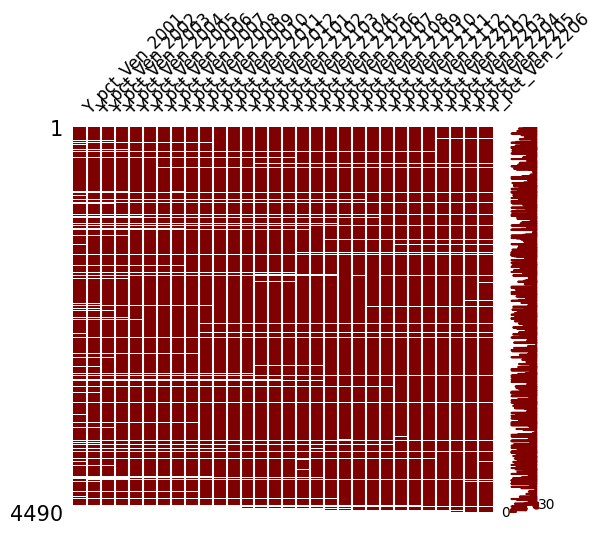

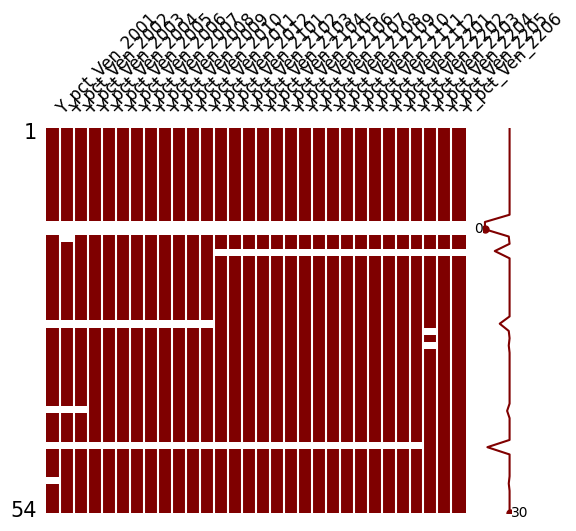

In [26]:
# Matriz de correlación, separando entre modelos y no modelos del nuevo dataset

# No modelo
novo_interes = novo[novo['Modelo'] == 0][Y_Ven]
msno.matrix(novo_interes, fontsize=12, color=[0.5,0,0], figsize=(6, 5))
plt.show()

# No modelo
novo_interes = novo[novo['Modelo'] == 1][Y_Ven]
msno.matrix(novo_interes, fontsize=12, color=[0.5,0,0], figsize=(6, 5))
plt.show()

In [28]:
novo.columns

Index(['ID', 'Subrubro', 'Omega', 'Modelo', 'F_pct_Com_1905', 'F_pct_Com_1906',
       'F_pct_Com_1907', 'F_pct_Com_1908', 'F_pct_Com_1909', 'F_pct_Com_1910',
       ...
       'Y_pct_Ven_2109', 'Y_pct_Ven_2110', 'Y_pct_Ven_2111', 'Y_pct_Ven_2112',
       'Y_pct_Ven_2201', 'Y_pct_Ven_2202', 'Y_pct_Ven_2203', 'Y_pct_Ven_2204',
       'Y_pct_Ven_2205', 'Y_pct_Ven_2206'],
      dtype='object', length=140)

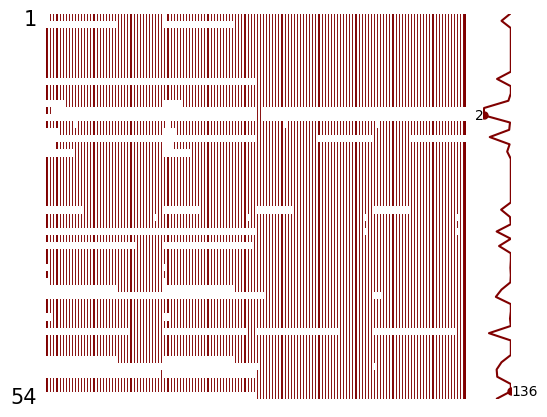

In [29]:
# Matriz de correlación, separando entre modelos y no modelos del nuevo dataset

# No modelo
novo_interes = novo[novo['Modelo'] == 1][F_Com+Y_Com+F_Ven+Y_Ven]
msno.matrix(novo_interes, fontsize=12, color=[0.5,0,0], figsize=(6, 5))
plt.show()

In [9]:
print('Viejo:')
print(f'\t El mínimo era {np.min(vectores_interes.min())}')
print(f'\t El máximo era {np.max(vectores_interes.max())}')

print('Nuevo:')
print(f'\t El mínimo es {np.min(novo_interes.min())}')
print(f'\t El máximo es {np.max(novo_interes.max())}')

Viejo:
	 El mínimo era -73626.94598813246
	 El máximo era 203697461.3233292
Nuevo:
	 El mínimo es -1344.2546858409478
	 El máximo es 2565.041189151882


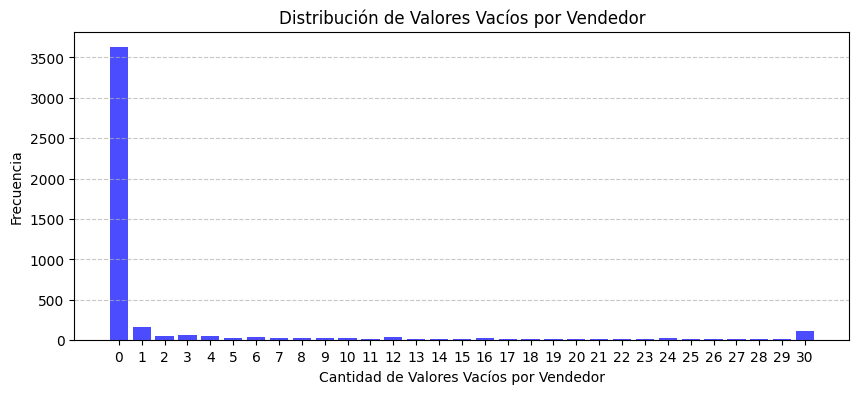

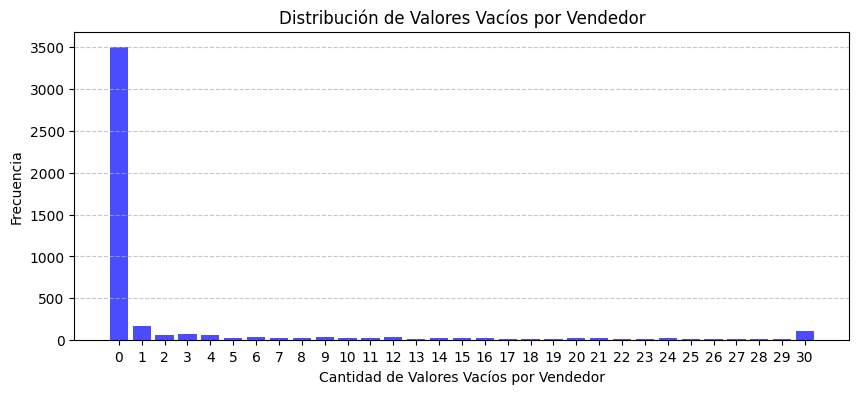

In [10]:
# Paso 1: Contar valores vacíos por fila
vacios_por_fila = vectores_interes.isnull().sum(axis=1)

# Paso 2: Generar un resumen de cuántas filas tienen 0, 1, 2, 3, etc., valores vacíos
resumen = vacios_por_fila.value_counts().reset_index()
resumen.columns = ['Cantidad de Valores Vacíos', 'Número de Filas']
resumen = resumen.sort_values(by='Cantidad de Valores Vacíos')

plt.figure(figsize=(10, 4))  # Tamaño del gráfico
plt.bar(resumen['Cantidad de Valores Vacíos'], resumen['Número de Filas'], color='blue', alpha=0.7)
plt.xlabel('Cantidad de Valores Vacíos por Vendedor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Valores Vacíos por Vendedor')
plt.xticks(resumen['Cantidad de Valores Vacíos'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Muestra el gráfico
plt.show()

# Paso 1: Contar valores vacíos por fila
vacios_por_fila = novo_interes.isnull().sum(axis=1)

# Paso 2: Generar un resumen de cuántas filas tienen 0, 1, 2, 3, etc., valores vacíos
resumen = vacios_por_fila.value_counts().reset_index()
resumen.columns = ['Cantidad de Valores Vacíos', 'Número de Filas']
resumen = resumen.sort_values(by='Cantidad de Valores Vacíos')

plt.figure(figsize=(10, 4))  # Tamaño del gráfico
plt.bar(resumen['Cantidad de Valores Vacíos'], resumen['Número de Filas'], color='blue', alpha=0.7)
plt.xlabel('Cantidad de Valores Vacíos por Vendedor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Valores Vacíos por Vendedor')
plt.xticks(resumen['Cantidad de Valores Vacíos'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Muestra el gráfico
plt.show()



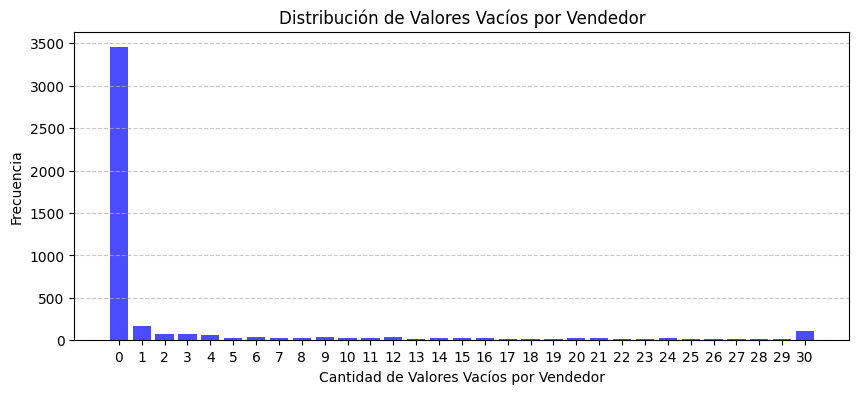

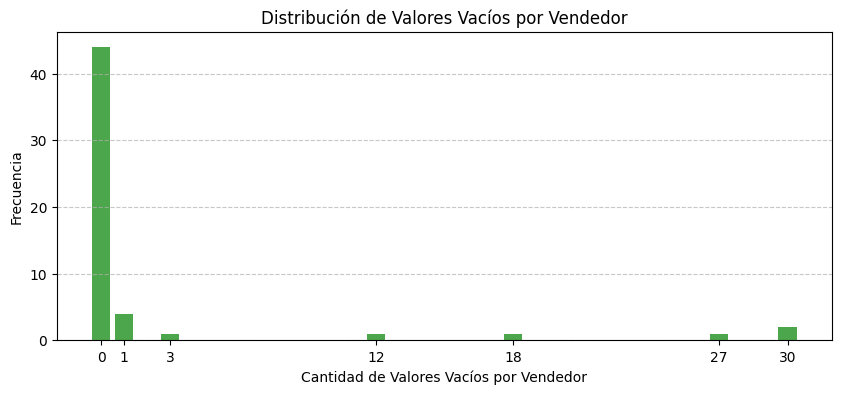

In [25]:
novo_interes = novo[['Modelo']+Y_Ven]

# Paso 1: Contar valores vacíos por fila
vacios_por_fila_0 = novo_interes[novo_interes['Modelo'] == 0].isnull().sum(axis=1)
vacios_por_fila_1 = novo_interes[novo_interes['Modelo'] == 1].isnull().sum(axis=1)

# Paso 2: Generar un resumen de cuántas filas tienen 0, 1, 2, 3, etc., valores vacíos
resumen_0 = vacios_por_fila_0.value_counts().reset_index()
resumen_0.columns = ['Cantidad de Valores Vacíos', 'Número de Filas']
resumen_0 = resumen_0.sort_values(by='Cantidad de Valores Vacíos')


resumen_1 = vacios_por_fila_1.value_counts().reset_index()
resumen_1.columns = ['Cantidad de Valores Vacíos', 'Número de Filas']
resumen_1 = resumen_1.sort_values(by='Cantidad de Valores Vacíos')

plt.figure(figsize=(10, 4))  # Tamaño del gráfico
plt.bar(resumen_0['Cantidad de Valores Vacíos'], resumen_0['Número de Filas'], color='blue', alpha=0.7, label='No mod')
plt.xlabel('Cantidad de Valores Vacíos por Vendedor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Valores Vacíos por Vendedor')
plt.xticks(resumen_0['Cantidad de Valores Vacíos'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.figure(figsize=(10, 4))  # Tamaño del gráfico
plt.bar(resumen_1['Cantidad de Valores Vacíos'], resumen_1['Número de Filas'], color='green', alpha=0.7, label='Mod')
plt.xlabel('Cantidad de Valores Vacíos por Vendedor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Valores Vacíos por Vendedor')
plt.xticks(resumen_1['Cantidad de Valores Vacíos'])
plt.grid(axis='y', linestyle='--', alpha=0.7)



# Muestra el gráfico
plt.show()


---
# Selección del Número de Clusters <span style="color:magenta">**(Paso 2)**</span>

### Elbow method

Para probar, le quito los vacíos.

(3630, 30)
(3502, 30)


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

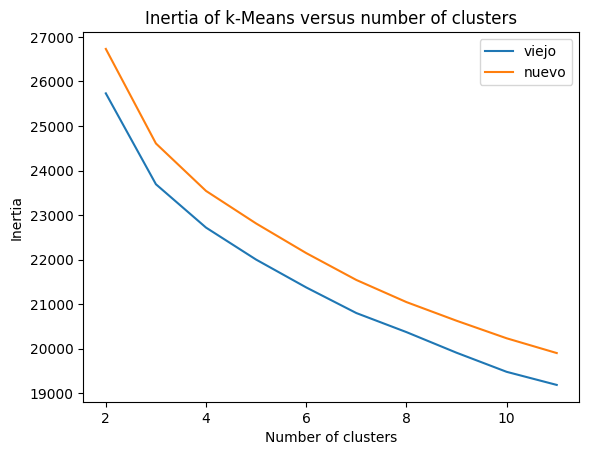

In [11]:
vectores_interes_sin_vacios = vectores_interes.dropna().copy()
print(vectores_interes_sin_vacios.shape)

# me quedo con el +-500% que se ve como un 5 acá OJO
vec_pm500 = vectores_interes_sin_vacios.where((vectores_interes_sin_vacios < 5) & (vectores_interes_sin_vacios > - 5))
vec_pm500 = vec_pm500.dropna()

vectores_interes_sin_vacios = vec_pm500

#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores1 = [KMeans(n_clusters=i, n_init=10).fit(vectores_interes_sin_vacios).inertia_ for i in range(2,12)]


vectores_interes_sin_vacios = novo_interes.dropna().copy()
print(vectores_interes_sin_vacios.shape)

# me quedo con el +-500% que se ve como un 5 acá OJO
vec_pm500 = vectores_interes_sin_vacios.where((vectores_interes_sin_vacios < 5) & (vectores_interes_sin_vacios > - 5))
vec_pm500 = vec_pm500.dropna()

vectores_interes_sin_vacios = vec_pm500

#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores2 = [KMeans(n_clusters=i, n_init=10).fit(vectores_interes_sin_vacios).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores1, label='viejo')
plt.plot(np.arange(2, 12), scores2, label='nuevo')
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.legend()
plt.title("Inertia of k-Means versus number of clusters")

plt.show()

---
## Aplicación de Modelos de Clustering <span style="color:magenta">**(Paso 3)**</span>

### K-means

In [15]:
vectores_interes_sin_vacios = vectores_interes.dropna().copy()

km = KMeans(n_clusters=3, n_init=10) # El parámetro n_init igual a 10 me lo pide para no tirar error. Ver luego qué implica.
km.fit(vectores_interes_sin_vacios)
clusters = km.labels_

vectores_clusters = vectores_interes_sin_vacios.copy()
vectores_clusters['kmeans_3'] = km.labels_
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

# Esto está hecho metiendo a todos los rubros en la misma bolsa
# Hacer por subrubro
vectores_clusters['kmeans_3'].value_counts()

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


kmeans_3
0    3628
2       1
1       1
Name: count, dtype: int64

In [16]:
vectores_interes_sin_vacios = novo_interes.dropna().copy()

km = KMeans(n_clusters=3, n_init=10) # El parámetro n_init igual a 10 me lo pide para no tirar error. Ver luego qué implica.
km.fit(vectores_interes_sin_vacios)
clusters = km.labels_

vectores_clusters = vectores_interes_sin_vacios.copy()
vectores_clusters['kmeans_3'] = km.labels_
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

# Esto está hecho metiendo a todos los rubros en la misma bolsa
# Hacer por subrubro
vectores_clusters['kmeans_3'].value_counts()

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


kmeans_3
0    3498
2       2
1       2
Name: count, dtype: int64

### PCA

In [17]:
std_scale=preprocessing.StandardScaler().fit(vec_pm500)
X_scaled=std_scale.transform(vec_pm500) # numpyarray Estandarizado (le resta la media y divide por el desvío) por columna

pca=decomposition.PCA(n_components=4) #elegimos 2, 3 o 4 pero pueden ser más,

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)


proporción de varianza por componente:  [0.17025947 0.15519927 0.09818554 0.0670242 ]
proporción de varianza por componente acumulada:  [0.17025947 0.32545874 0.42364428 0.49066847]
tamaño de los datos:  (2328, 4)


In [ ]:
X_tsne_kmeans_3 = pd.DataFrame(X_projected)
X_tsne_kmeans_3['kmeans_3'] = km.labels_

sns.scatterplot(data=X_tsne_kmeans_3,
                x=0, 
                y=1, 
                hue="kmeans_3", 
                palette="deep")#, alpha=0.25)

# sns.pairplot(X_projected)

In [ ]:
from sklearn import (manifold, preprocessing, decomposition)

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(vec_pm500)

In [ ]:
X_tsne_kmeans_3 = pd.DataFrame(X_tsne)
X_tsne_kmeans_3['kmeans_3'] = km.labels_

sns.scatterplot(data=X_tsne_kmeans_3,
                x=0, 
                y=1, 
                hue="kmeans_3", 
                palette="deep")